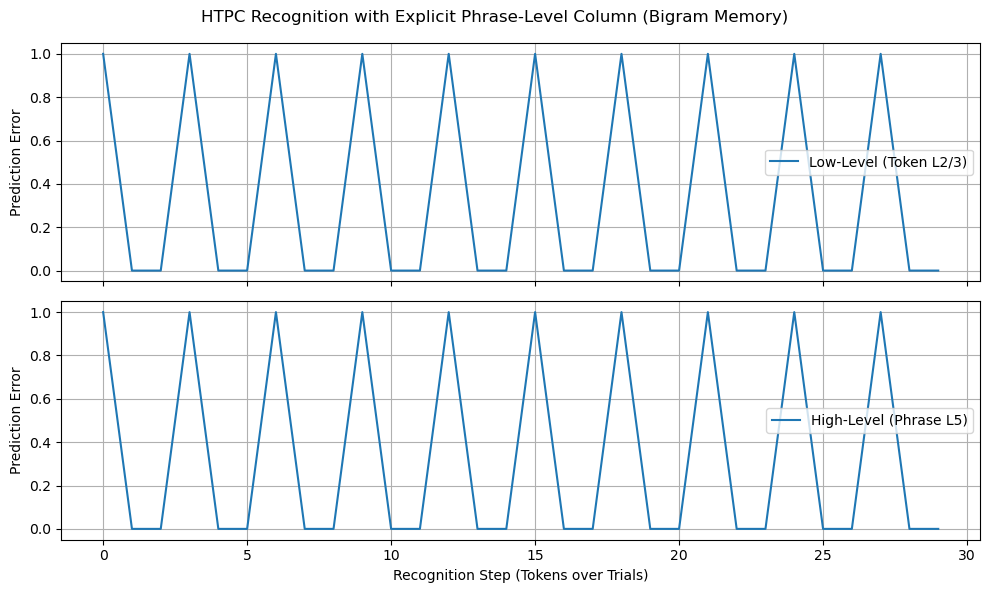

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === Define the input sequence (e.g., tokenized sentence) ===
token_sequence = ['the', 'dog', 'ran']
n_tokens = len(token_sequence)
n_levels = 2  # Level 0 = token-level, Level 1 = phrase-level
n_trials = 10

# === High-order phrase memory: bigrams (2-token phrases) ===
# Simulating a high-level cortical column that stores chunks
# These are learned pairs with associated prediction masks
# (e.g., which tokens are expected to be active)
high_order_phrases = {
    ('the', 'dog'): np.array([1, 1, 0]),  # expects 'the' and 'dog'
    ('dog', 'ran'): np.array([0, 1, 1]),  # expects 'dog' and 'ran'
    # You can add more bigrams here
}

# === Token-level learned transition table (low-level column) ===
token_prediction_matrix = {
    'the': 'dog',
    'dog': 'ran',
    'ran': None
}

# === Prepare data structures for prediction storage ===
level_predictions = [np.zeros(n_tokens) for _ in range(n_levels)]
prediction_errors = [[] for _ in range(n_levels)]

# === Recognition simulation across multiple trials ===
for trial in range(n_trials):
    for i, token in enumerate(token_sequence):
        # === Layer 4: bottom-up sensory input ===
        actual = 1.0  # Token is present at time i

        # === High-order L5: top-down phrase-level prediction ===
        high_pred_vector = np.zeros(n_tokens)
        if i > 0:
            phrase = (token_sequence[i - 1], token)
            if phrase in high_order_phrases:
                high_pred_vector = high_order_phrases[phrase]

        # === Layer 2/3: low-level prediction (temporal) ===
        predicted_token = None
        if i > 0:
            predicted_token = token_prediction_matrix.get(token_sequence[i - 1], None)

        low_pred = 1.0 if predicted_token == token else 0.0
        error = abs(actual - low_pred)
        level_predictions[0][i] = low_pred
        prediction_errors[0].append(error)

        # === Layer 2/3: compare high-level top-down prediction ===
        high_pred = high_pred_vector[i]
        error_high = abs(actual - high_pred)
        level_predictions[1][i] = high_pred
        prediction_errors[1].append(error_high)

# === Plot prediction error for both layers ===
fig, ax = plt.subplots(n_levels, 1, figsize=(10, 6), sharex=True)
labels = ['Low-Level (Token L2/3)', 'High-Level (Phrase L5)']

for lvl in range(n_levels):
    ax[lvl].plot(prediction_errors[lvl], label=labels[lvl])
    ax[lvl].set_ylabel("Prediction Error")
    ax[lvl].legend()
    ax[lvl].grid(True)

ax[-1].set_xlabel("Recognition Step (Tokens over Trials)")
plt.suptitle("HTPC Recognition with Explicit Phrase-Level Column (Bigram Memory)")
plt.tight_layout()
plt.show()
